# Data Exploration & Preprocessing
--- 

### using S&P 500 Stock Prices Dataset 
--- 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stock_data = pd.read_csv('all_stocks_5yr.csv')
stock_data.head(5)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [6]:
stock_data.tail(10)

,date,open,high,low,close,volume,Name
619030,2018-01-25,78.47,79.38,78.345,79.25,2327262,ZTS
619031,2018-01-26,79.49,80.13,79.380,80.09,2532808,ZTS
619032,2018-01-29,79.81,79.95,79.110,79.18,2662383,ZTS
619033,2018-01-30,78.44,78.69,77.910,78.35,3808707,ZTS
619034,2018-01-31,78.49,78.77,76.540,76.73,4136360,ZTS
619035,2018-02-01,76.84,78.27,76.690,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.730,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.180,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.130,73.27,4924323,ZTS
619039,2018-02-07,72.70,75.00,72.690,73.86,4534912,ZTS


In [7]:
stock_data.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [3]:
stock_data.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [9]:
stock_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [4]:
stock_data_numeric = stock_data.select_dtypes(include='number')
stock_data_numeric.head()

,open,high,low,close,volume
0,15.07,15.12,14.63,14.75,8407500
1,14.89,15.01,14.26,14.46,8882000
2,14.45,14.51,14.10,14.27,8126000
3,14.30,14.94,14.25,14.66,10259500
4,14.94,14.96,13.16,13.99,31879900


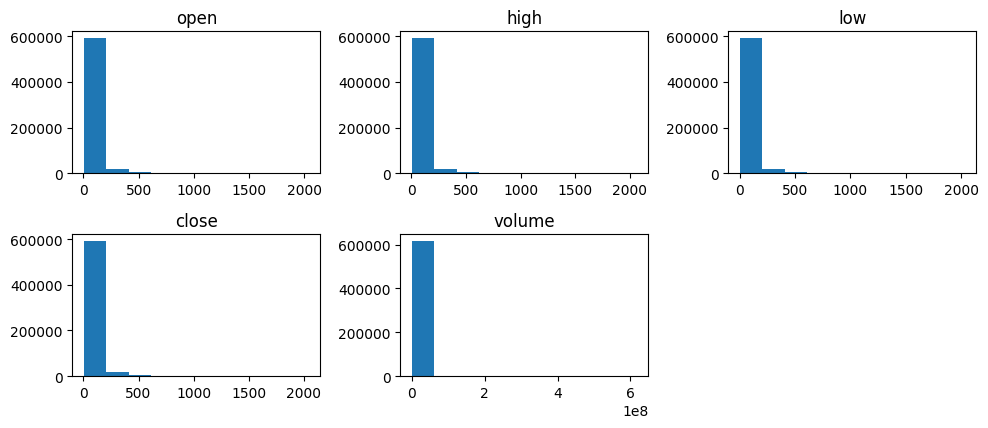

In [5]:
plt.figure(figsize=(10,6))
for i,col in enumerate(stock_data_numeric.columns):
    plt.subplot(3, 3, i+1)
    plt.hist(stock_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [6]:
stock_data['open'] = stock_data['open'].interpolate(method='linear')
stock_data['high'] = stock_data['high'].interpolate(method='linear')
stock_data['low'] = stock_data['low'].interpolate(method='linear')

In [7]:
stock_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

- Outliers
--- 

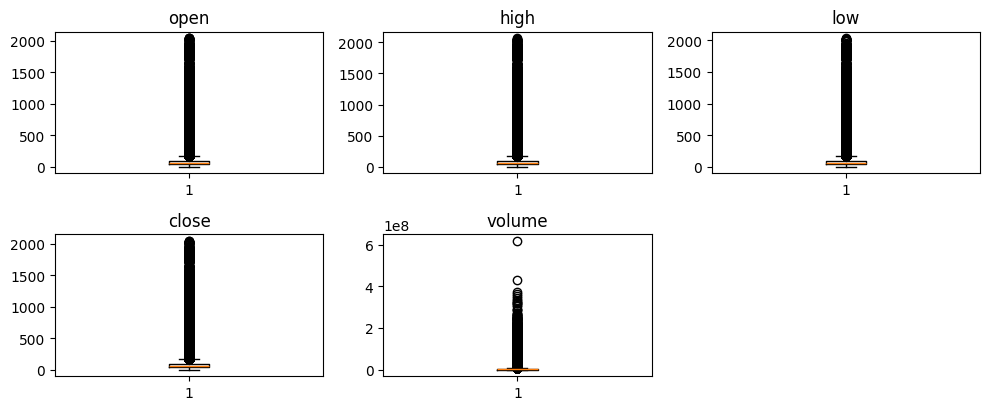

In [8]:
plt.figure(figsize=(10,6))
for i,col in enumerate(stock_data_numeric.columns):
    plt.subplot(3, 3, i+1)
    plt.boxplot(stock_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [9]:
def handling_outliers(columns):
    for i in columns:
        lower_quantitle = stock_data[i].quantile(.25)
        upper_quantitle = stock_data[i].quantile(.75)

        IQR = upper_quantitle - lower_quantitle

        lower_bound = lower_quantitle-1.5*IQR
        upper_bound = upper_quantitle+1.5*IQR

        stock_data[i] = np.where(stock_data[i]<lower_bound,lower_bound,stock_data[i])
        stock_data[i] = np.where(stock_data[i]>upper_bound,upper_bound,stock_data[i])
handling_outliers(stock_data_numeric)

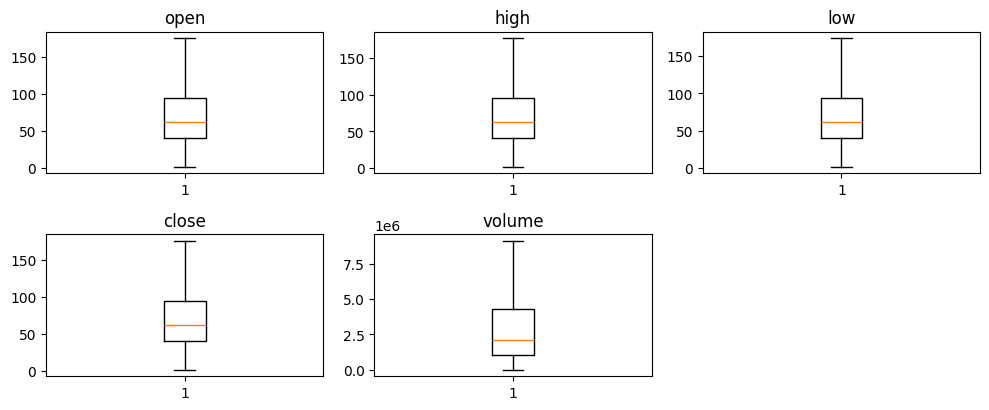

In [10]:
def boxplotting(stock_data_numeric):
    plt.figure(figsize=(10,6))
    for i, col in enumerate(stock_data_numeric.columns):
        plt.subplot(3, 3, i+1)
        plt.boxplot(stock_data[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()
boxplotting(stock_data_numeric)

- Correlation
--- 

            open      high       low     close    volume
open    1.000000  0.999897  0.999885  0.999795 -0.394333
high    0.999897  1.000000  0.999836  0.999897 -0.393032
low     0.999885  0.999836  1.000000  0.999895 -0.395901
close   0.999795  0.999897  0.999895  1.000000 -0.394522
volume -0.394333 -0.393032 -0.395901 -0.394522  1.000000


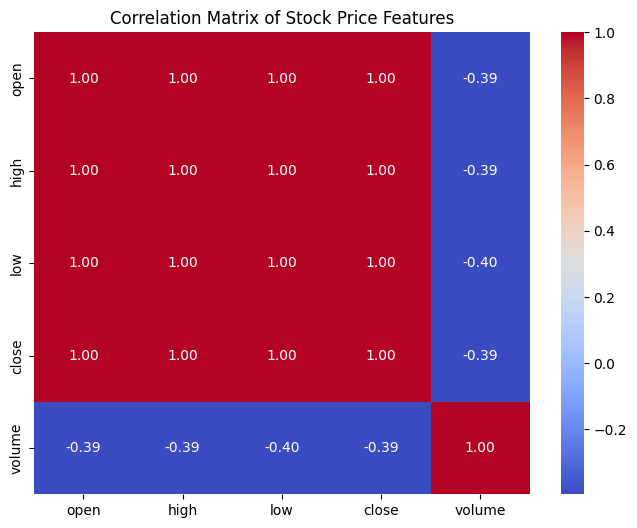

In [17]:
# Compute Pearson correlation between numerical columns
correlation_matrix = stock_data[['open', 'high', 'low', 'close', 'volume']].corr(method='pearson')

# Display correlation matrix
print(correlation_matrix)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Stock Price Features")
plt.show()

- Distribution of stock for closing price
--- 

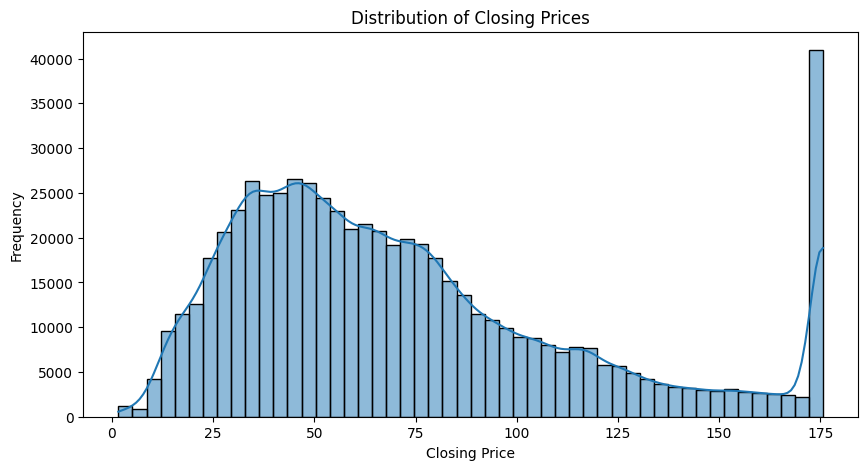

In [11]:
# closing price distribution
plt.figure(figsize=(10, 5))
sns.histplot(stock_data['close'], bins=50, kde=True)
plt.title("Distribution of Closing Prices")
plt.xlabel("Closing Price")
plt.ylabel("Frequency")
plt.show()

In [12]:
stock_sales = stock_data.groupby('date')['close'].sum().reset_index()
stock_sales['date'] = pd.to_datetime(stock_sales['date'])
stock_sales.set_index('date',inplace=True)
stock_sales.head()

,close
date,
2013-02-08,26361.0150
2013-02-11,26329.6075
2013-02-12,26389.0455
2013-02-13,26417.7075
2013-02-14,26399.2754


- Identifying Trend and Seasonality
--- 

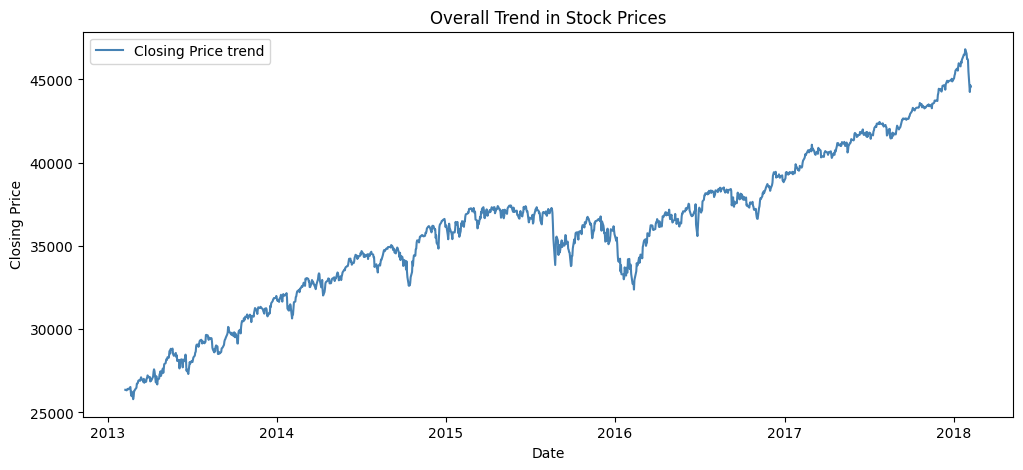

In [13]:
# Plot overall trend in average closing prices
plt.figure(figsize=(12, 5))
plt.plot(stock_sales["close"], label="Closing Price trend", color="steelblue")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Overall Trend in Stock Prices")
plt.legend()
plt.show()

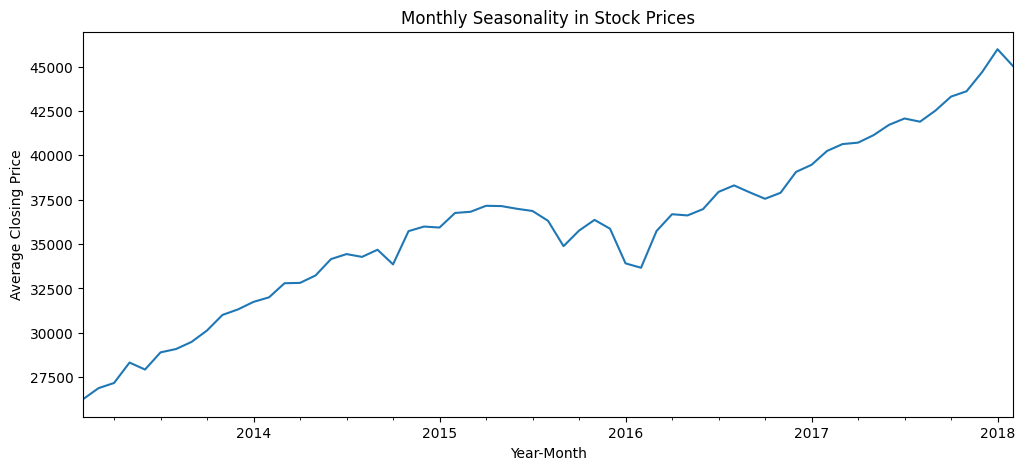

In [14]:

# Check for seasonality by analyzing monthly average closing prices
monthly_avg = stock_sales['close'].resample('ME').mean()  # Resample by month and compute mean

# Plot seasonality pattern
plt.figure(figsize=(12, 5))
monthly_avg.plot()
plt.xlabel("Year-Month")
plt.ylabel("Average Closing Price")
plt.title("Monthly Seasonality in Stock Prices")
plt.show()


- Autocorrection
--- 

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

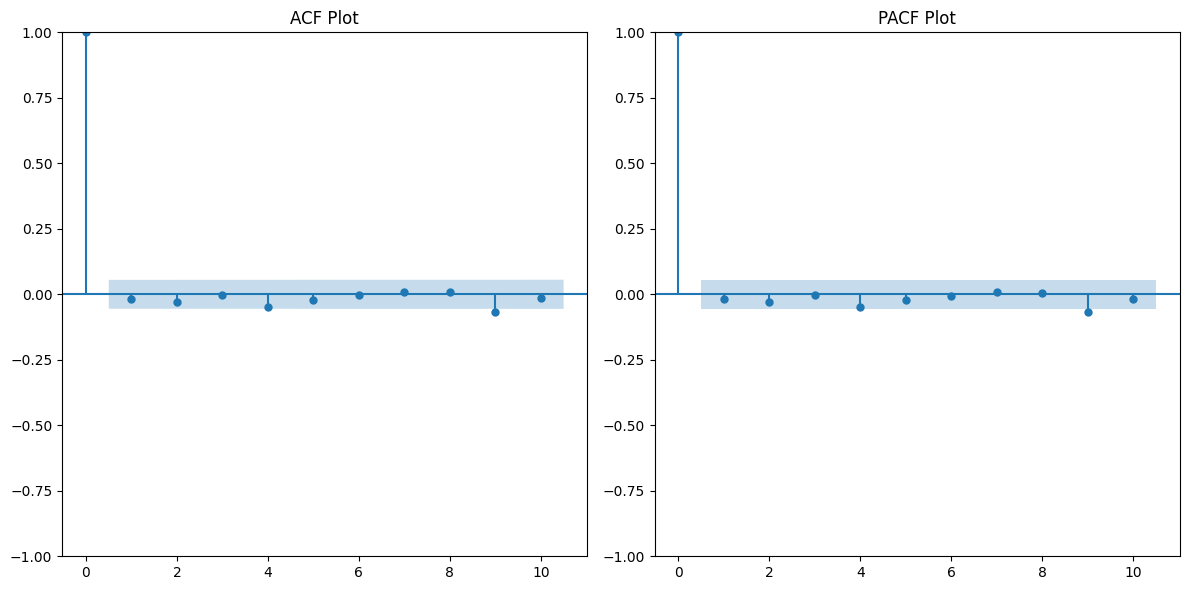

In [16]:

# Plot ACF and PACF
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(stock_sales['close'].diff().dropna(), lags=10, ax=plt.gca())
plt.title('ACF Plot')

plt.subplot(1, 2, 2)
plot_pacf(stock_sales['close'].diff().dropna(), lags=10, ax=plt.gca())
plt.title('PACF Plot')

plt.tight_layout()
plt.show()

#vertical- correlation
#horizontal- lags (lags in shaded region is not statistically significant)

- Handling stationarity
--- 

In [17]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

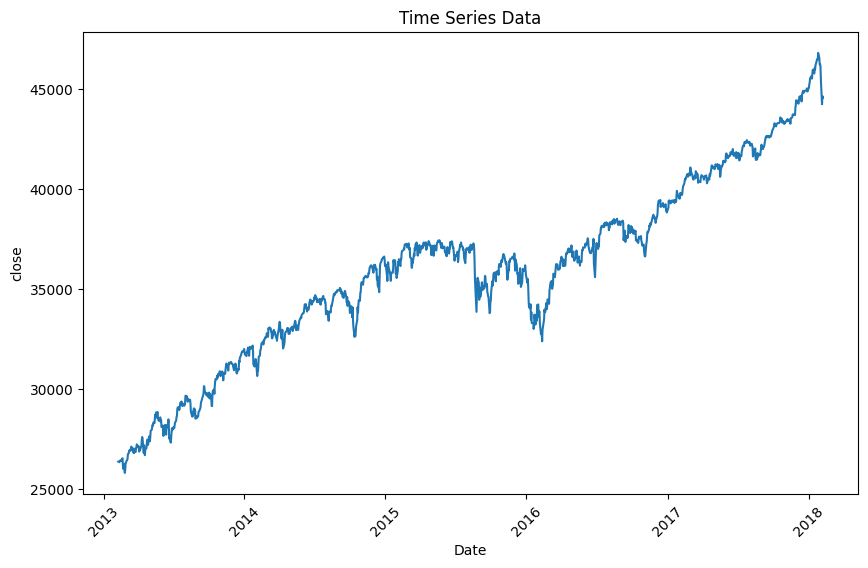

ADF Test Results:
ADF Statistic: -1.1117356998398165
p-value: 0.7103692245657233
Critical Values:
	1%: -3.4355588184378574
	5%: -2.8638402312881497
	10%: -2.5679946684494275

Conclusion: The series is non-stationary.


In [18]:

# Visualize the original series
plt.figure(figsize=(10, 6))
plt.plot(stock_sales['close'])
plt.title('Time Series Data')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('close')
plt.show()

# Perform the Augmented Dickey-Fuller test
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print("ADF Test Results:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value}")
    
    if result[1] < 0.05:
        print("\nConclusion: The series is stationary.")
    else:
        print("\nConclusion: The series is non-stationary.")

# Run ADF test on AirPassengers data
adf_test(stock_sales['close'])


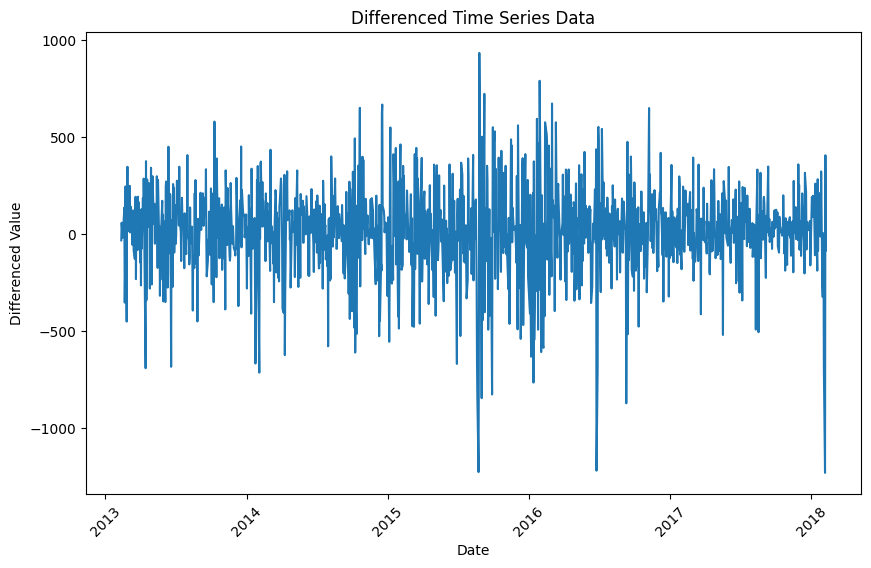

In [19]:
# Applying differencing
differenced_series = stock_sales.diff().dropna() # removes the first value (which is NaN)

# Visualize the differenced series
plt.figure(figsize=(10, 6))
plt.plot(differenced_series)
plt.title('Differenced Time Series Data')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Differenced Value')
plt.show()


- Time series Decompostion

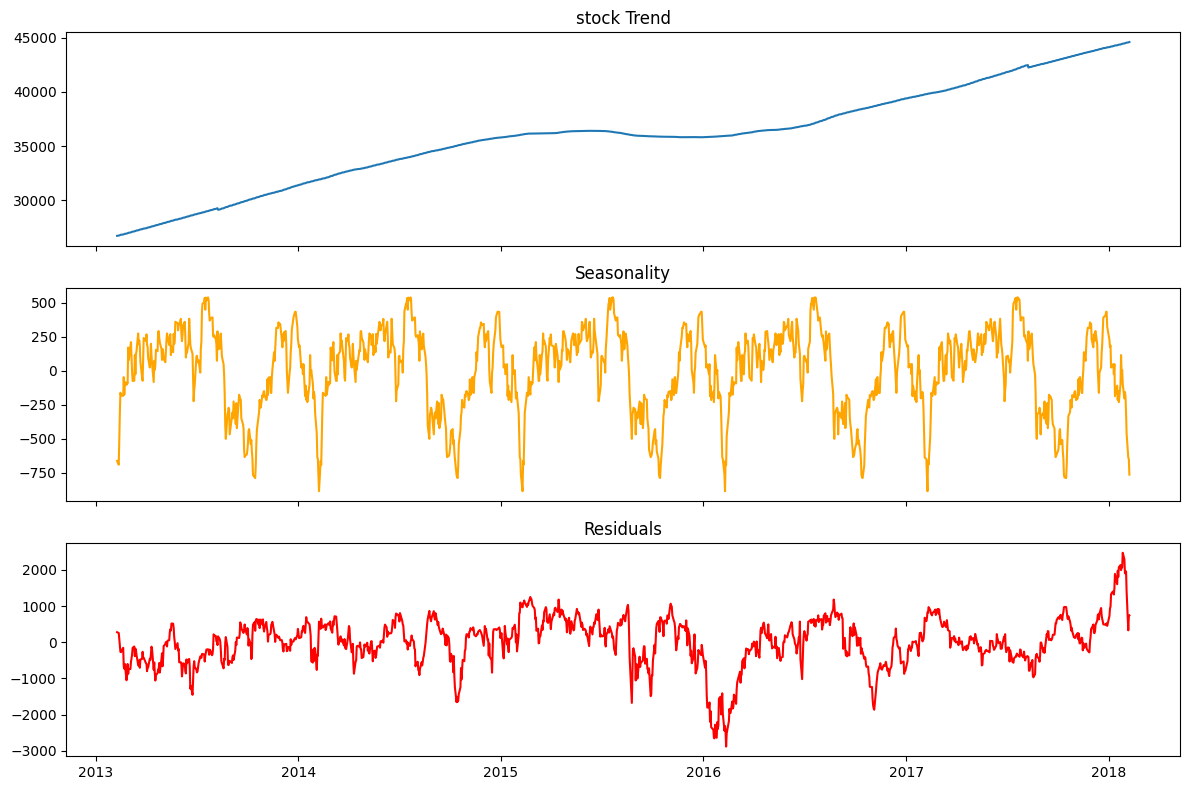

In [20]:
# Perform decomposition on the aggregated time series
decomposition = seasonal_decompose(stock_sales['close'], period=252, model='additive', extrapolate_trend='freq')

# Plot the decomposition results
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

axes[0].plot(stock_sales.index, decomposition.trend, label="Trend")
axes[0].set_title("stock Trend")

axes[1].plot(stock_sales.index, decomposition.seasonal, label="Seasonality", color='orange')
axes[1].set_title("Seasonality")

axes[2].plot(stock_sales.index, decomposition.resid, label="Residuals", color='red')
axes[2].set_title("Residuals")

plt.tight_layout()
plt.show()


In [22]:
# Create lag features (previous day's closing price)
stock_sales['lag_1'] = stock_sales['close'].shift(1)
stock_sales['lag_7'] = stock_sales['close'].shift(7)

# Create rolling mean features
stock_sales['rolling_mean_7'] = stock_sales['close'].rolling(window=7).mean()
stock_sales['rolling_mean_30'] = stock_sales['close'].rolling(window=30).mean()

# Drop NaN values generated by shifting/rolling
stock_sales.dropna(inplace=True)

# Display the first few rows
print(stock_sales.head())


                 close       lag_1       lag_7  rolling_mean_7  \
date                                                             
2013-05-03  27905.1663  27605.7747  27336.8731    27533.245786   
2013-05-06  27958.9149  27905.1663  27473.9549    27602.525786   
2013-05-07  28116.5979  27958.9149  27194.1587    27734.302814   
2013-05-08  28212.9269  28116.5979  27537.1726    27830.839143   
2013-05-09  28164.1799  28212.9269  27637.6013    27906.064657   

            rolling_mean_30  
date                         
2013-05-03     27190.990410  
2013-05-06     27225.412847  
2013-05-07     27267.782043  
2013-05-08     27306.899860  
2013-05-09     27343.727890  


In [108]:
stock_sales.shape

(1201, 5)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
#  sorting data by date before splitting
stock_sales = stock_sales.sort_index()
stock_sales

,close,lag_1,lag_7,rolling_mean_7,rolling_mean_30
date,,,,,
2013-05-03,27905.1663,27605.7747,27336.8731,27533.245786,27190.990410
2013-05-06,27958.9149,27905.1663,27473.9549,27602.525786,27225.412847
2013-05-07,28116.5979,27958.9149,27194.1587,27734.302814,27267.782043
2013-05-08,28212.9269,28116.5979,27537.1726,27830.839143,27306.899860
2013-05-09,28164.1799,28212.9269,27637.6013,27906.064657,27343.727890
...,...,...,...,...,...
2018-02-01,46167.5800,46234.6500,46494.5675,46425.145357,45699.857550
2018-02-02,45479.5050,46167.5800,46483.0800,46281.777500,45721.011050
2018-02-05,44248.5425,45479.5050,46493.0725,45961.130357,45701.613467


In [ ]:


# Defining the split index
split_index = int(len(stock_sales) * 0.8)

# Splitting the data
train_data = stock_sales.iloc[:split_index]
test_data = stock_sales.iloc[split_index:]

# Display the sizes
print(f"Training Data: {train_data.shape}")
print(f"Testing Data: {test_data.shape}")


Training Data: (960, 5)
Testing Data: (241, 5)


### Using New York City Energy Consumption Dataset
--- 

In [27]:
power_consumption = pd.read_csv('elec_city.csv')
power_consumption.head()

,tstp,energy(kWh/hh)
0,2011-11-23 09:00:00,0.284500
1,2011-11-23 09:30:00,0.280500
2,2011-11-23 10:00:00,0.153333
3,2011-11-23 10:30:00,0.098000
4,2011-11-23 11:00:00,0.110286


In [28]:
power_consumption['tstp'] = pd.to_datetime(power_consumption['tstp'])

In [29]:
power_consumption.tail()

,tstp,energy(kWh/hh)
39722,2014-02-27 22:00:00,0.299760
39723,2014-02-27 22:30:00,0.285163
39724,2014-02-27 23:00:00,0.252274
39725,2014-02-27 23:30:00,0.215284
39726,2014-02-28 00:00:00,0.208997


In [30]:
power_consumption.isnull().sum()

tstp              0
energy(kWh/hh)    0
dtype: int64

In [31]:
power_consumption.dtypes

tstp              datetime64[ns]
energy(kWh/hh)           float64
dtype: object

In [13]:
power_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39727 entries, 0 to 39726
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tstp            39727 non-null  datetime64[ns]
 1   energy(kWh/hh)  39727 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 620.9 KB


In [ ]:
# Summary statistics
power_consumption.describe()


,tstp,energy(kWh/hh)
count,39727,39727.000000
mean,2013-01-10 04:30:00,0.217170
min,2011-11-23 09:00:00,0.091800
25%,2012-06-17 06:45:00,0.162369
50%,2013-01-10 04:30:00,0.209297
75%,2013-08-05 02:15:00,0.260414
max,2014-02-28 00:00:00,0.479579
std,NaN,0.076554


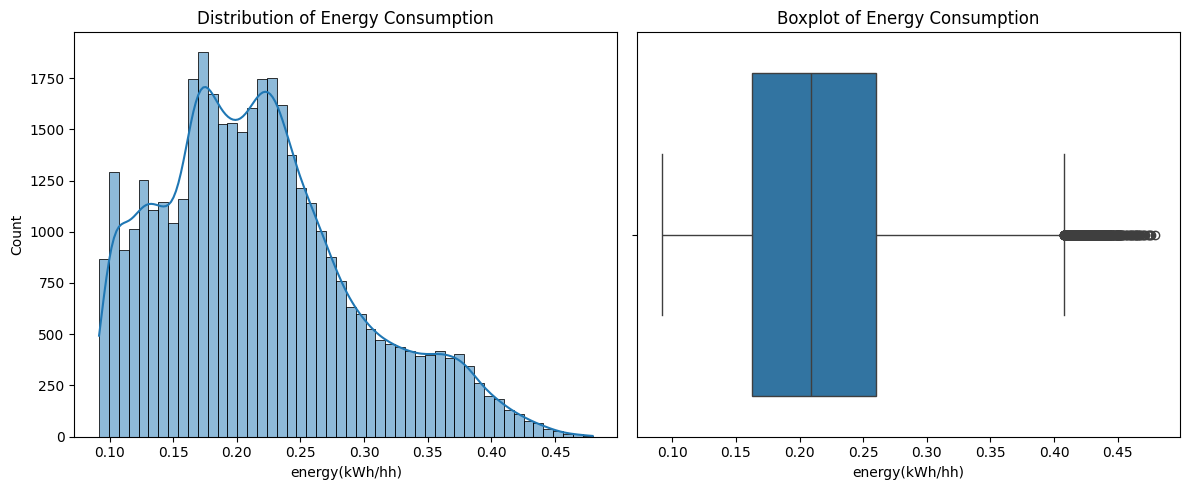

In [32]:

# Plot histogram and boxplot to identify outliers
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(power_consumption['energy(kWh/hh)'], bins=50, kde=True)
plt.title("Distribution of Energy Consumption")

plt.subplot(1, 2, 2)
sns.boxplot(x=power_consumption['energy(kWh/hh)'])
plt.title("Boxplot of Energy Consumption")

plt.tight_layout()
plt.show()



In [33]:
# Identify outliers using IQR method
Q1 = power_consumption['energy(kWh/hh)'].quantile(0.25)
Q3 = power_consumption['energy(kWh/hh)'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.4 * IQR


power_consumption_cleaned = power_consumption[(power_consumption['energy(kWh/hh)'] <= upper_bound)]



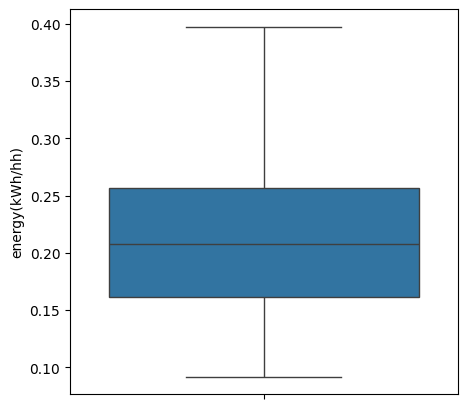

In [36]:
plt.figure(figsize=(5,5))
sns.boxplot(power_consumption_cleaned['energy(kWh/hh)'])
plt.show()

- Daily Seasonality
--- 

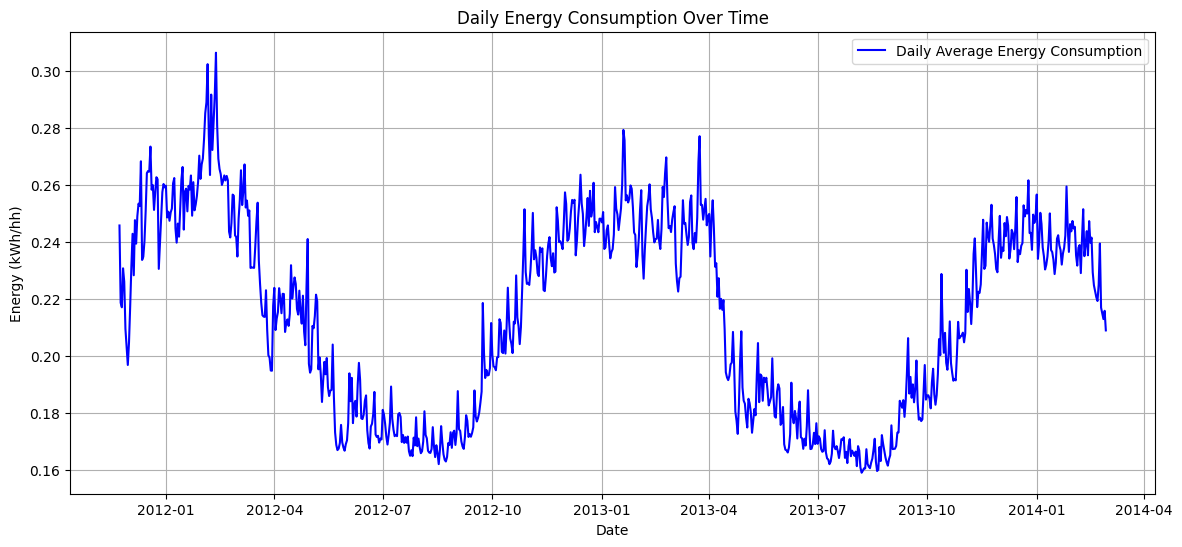

In [37]:

df_daily = power_consumption_cleaned.resample('D', on='tstp').mean()

# Plot the time series trend
plt.figure(figsize=(14, 6))
plt.plot(df_daily.index, df_daily['energy(kWh/hh)'], label='Daily Average Energy Consumption', color='blue')
plt.xlabel('Date')
plt.ylabel('Energy (kWh/hh)')
plt.title('Daily Energy Consumption Over Time')
plt.legend()
plt.grid(True)
plt.show()


- Hourly power consumption
--- 

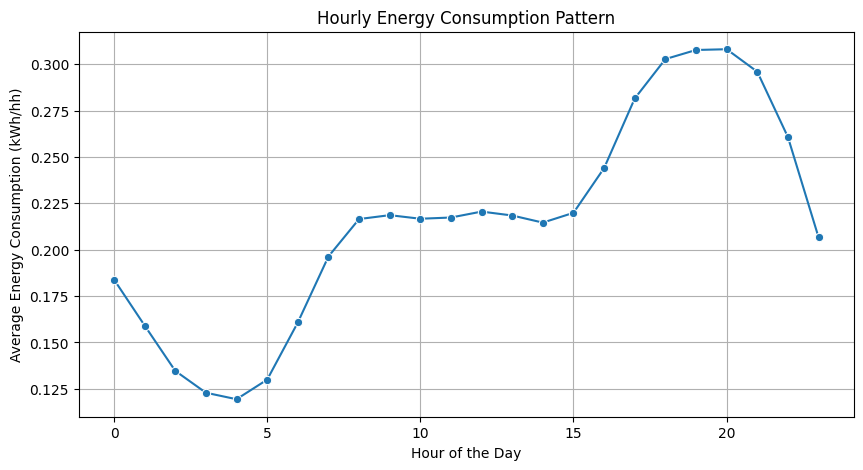

In [38]:
# Ensure we're working on a copy
power_consumption_cleaned = power_consumption_cleaned.copy()

# Extract hour safely
power_consumption_cleaned['hour'] = power_consumption_cleaned['tstp'].dt.hour

# Compute mean energy consumption by hour
hourly_avg = power_consumption_cleaned.groupby('hour')['energy(kWh/hh)'].mean()

# Plot daily seasonality pattern
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values, marker='o')
plt.xlabel("Hour of the Day")
plt.ylabel("Average Energy Consumption (kWh/hh)")
plt.title("Hourly Energy Consumption Pattern")
plt.grid(True)
plt.show()


- Monthly Seansonality
--- 

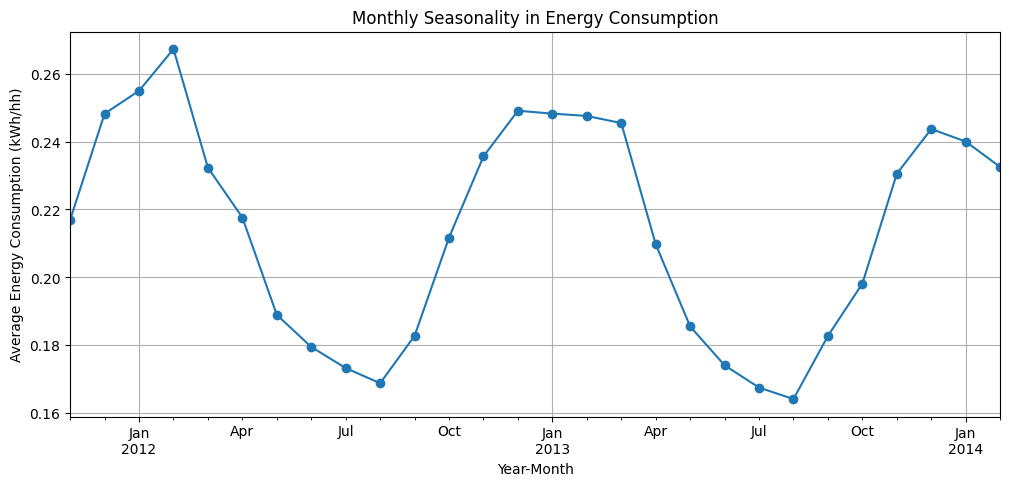

In [39]:
power_consumption_cleaned = power_consumption_cleaned.copy()
# Extract month and year
power_consumption_cleaned['year_month'] = power_consumption_cleaned['tstp'].dt.to_period('M')

# Compute average energy consumption per month
monthly_avg = power_consumption_cleaned.groupby('year_month')['energy(kWh/hh)'].mean()

# Plot monthly seasonality pattern
plt.figure(figsize=(12, 5))
monthly_avg.plot(marker='o', linestyle='-')
plt.xlabel("Year-Month")
plt.ylabel("Average Energy Consumption (kWh/hh)")
plt.title("Monthly Seasonality in Energy Consumption")
plt.grid(True)
plt.show()


- Power consumption trend
--- 

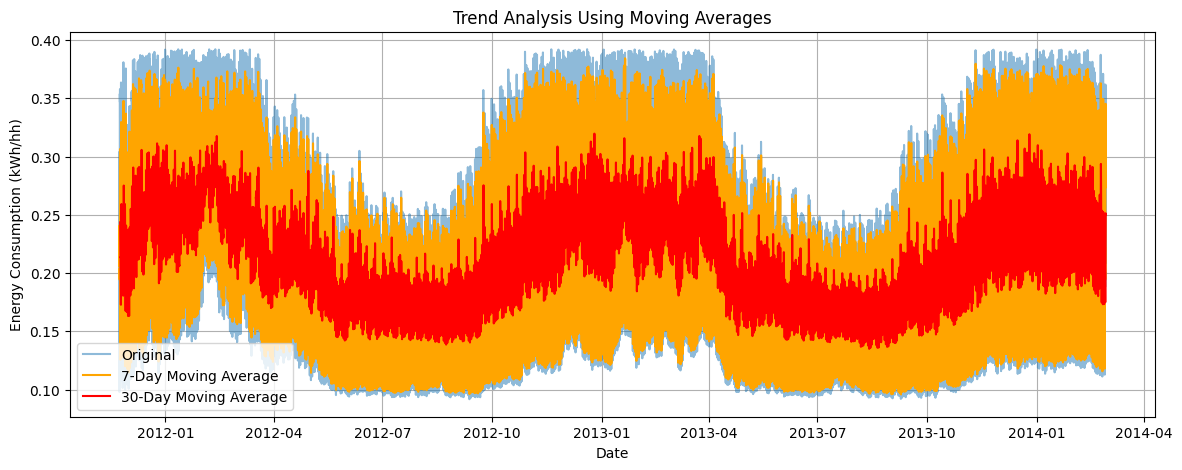

In [64]:
# Compute moving averages
power_consumption_cleaned['7_MA'] = power_consumption_cleaned['energy(kWh/hh)'].rolling(window=7).mean()
power_consumption_cleaned['30_MA'] = power_consumption_cleaned['energy(kWh/hh)'].rolling(window=30).mean()

# Plot trend with moving averages
plt.figure(figsize=(14, 5))
plt.plot(power_consumption_cleaned['tstp'], power_consumption_cleaned['energy(kWh/hh)'], label='Original', alpha=0.5)
plt.plot(power_consumption_cleaned['tstp'], power_consumption_cleaned['7d_MA'], label='7-Day Moving Average', color='orange')
plt.plot(power_consumption_cleaned['tstp'], power_consumption_cleaned['30d_MA'], label='30-Day Moving Average', color='red')

# Labels and title
plt.xlabel("Date")
plt.ylabel("Energy Consumption (kWh/hh)")
plt.title("Trend Analysis Using Moving Averages")
plt.legend()
plt.grid(True)
plt.show()


- Stationarity tests (ADF/KPSS)
--- 

In [ ]:
# Performing ADF test on the energy consumption column
adf_result = adfuller(power_consumption_cleaned['energy(kWh/hh)'])

# Extract and print results
adf_output = {
    "ADF Statistic": adf_result[0],
    "p-value": adf_result[1],
    "Critical Values": adf_result[4]
}

print(adf_output)
